In [764]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer as imp
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [765]:
data=pd.read_excel(r"C:\Users\ajmal\Downloads\DSA\iris (1).xls")

In [766]:
data.head(30)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [767]:
data['Classification'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

In [768]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [769]:
data['SL'].mean()

5.8559440559440565

In [770]:
data['SW'].mean()

3.0493055555555566

In [771]:
data['PL'].mean()

3.756250000000003

# filling data

In [772]:
data.bfill(axis=0,inplace=True) 

In [773]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.6,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.4,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [774]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [775]:
data['PL'].mean()

3.747333333333335

# correlation and heatmap

<AxesSubplot:>

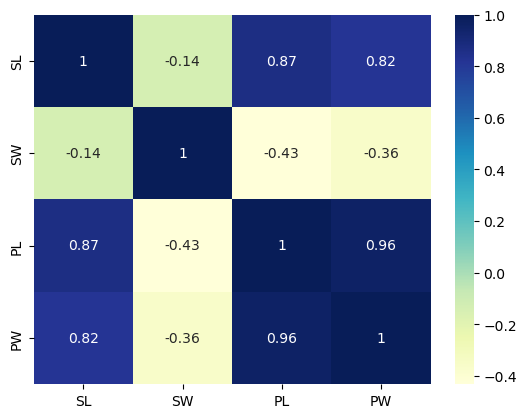

In [776]:
corr_matrix=data.corr()
corr_matrix
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

In [777]:
data1=data.drop('PW',axis=1)

In [778]:
LE=LabelEncoder()
data1['Classification']= LE.fit_transform(data1['Classification'])
#data1=pd.get_dummies(data1)

In [779]:
data1.head()

,SL,SW,PL,Classification
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.6,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0


In [780]:
x=data1.drop('Classification',axis=1)
y=data1['Classification']

In [781]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=.25)

# Decision Tree

In [782]:
from sklearn.tree import DecisionTreeClassifier
dt_cls= DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred_dt= dt_cls.predict(x_test)

In [783]:
confusion_matrix(y_test,y_pred_dt)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [784]:
accuracy_score(y_test,y_pred_dt)

1.0

# SVC

In [785]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [786]:
confusion_matrix(y_test,y_pred_svm)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [787]:
accuracy_score(y_test,y_pred_svm)

1.0

# Random forest

In [788]:
rf_class=RandomForestClassifier()
rf_class=rf_class.fit(x_train,y_train)
y_pred_rf= rf_class.predict(x_test)

In [789]:
confusion_matrix(y_test,y_pred_rf)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [790]:
accuracy_score(y_test,y_pred_rf)

1.0

# Logistic regression

In [791]:
logmodel=LogisticRegression()
logmodel=logmodel.fit(x_train,y_train)
y_pred_logmodel=logmodel.predict(x_test)

In [792]:
confusion_matrix(y_test,y_pred_logmodel)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [793]:
accuracy_score(y_test,y_pred_logmodel)

1.0

# knn

In [794]:
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

C:\Users\ajmal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ajmal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

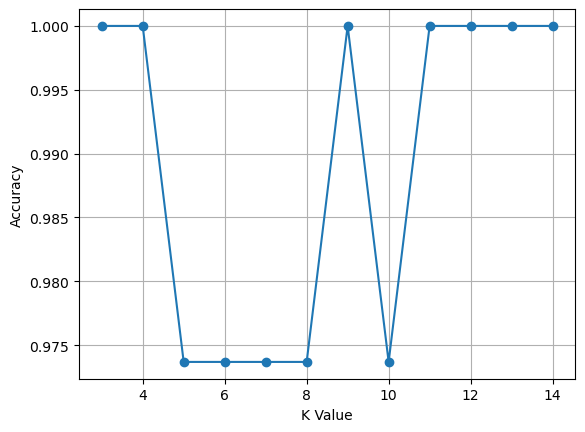

In [798]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid()